In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

Ejercicios: Álgebra lineal:
* 1 (teorico)
* 4 ✓
* 5 (teorico)
* 6 (teorico)
* 7 ✓
* 11 ✓
* 12 ✓
* 15 (sympy) ✓
* 16 (sympy)
* 17 ✓

Ejercicios: Aprendizaje automático: 1,2,3

* 1
* 2
* 3

----

# **Algebra Lineal**

------

### **Ejercicio 4**

In [2]:
def matrix_mult(A,B):
    '''
    A es una matriz nxm B es una matrix mxp
    
    Metodo retorna la multiplicacion matricial AB
    
    '''
    n = A.shape[0]
    m_a = A.shape[1]
    
    #Si B es un vector columna:
    if B.ndim==1:
        C = np.zeros(n)
        for i in range(m_a):
            #Combinacion lineal de los vectores columna de A, y los escalares siendo las entradas de B 
            C +=B[i]*A[:,i]
        return C
    
    m_b = B.shape[0]
    p = B.shape[1]
    if m_a!=m_b:
        print("Dimensiones no coinciden")
        return None
    
    C = np.zeros((n,p))
    
    for i in range(n):
        for j in range(p):
            C[i,j] = np.dot(A[i,:],B[:,j])
    return C

In [3]:
A = np.array([
    [1,0,0],
    [5,1,0],
    [-2,3,1]
])

In [4]:
B = np.array([
    [4,-2,1],
    [0,3,7],
    [0,0,2]
])

In [5]:
matrix_mult(A,B)

array([[ 4., -2.,  1.],
       [20., -7., 12.],
       [-8., 13., 21.]])

In [6]:
#Verificacion
A@B

array([[ 4, -2,  1],
       [20, -7, 12],
       [-8, 13, 21]])

----

### **Ejercicio 7**

In [7]:
A = np.array([
    [3,-1,-1],
    [-1,3,1],
    [2,1,4]
])

b = np.array([1,3,7])

In [8]:
np.linalg.solve(A,b)

array([1., 1., 1.])

In [9]:
x = np.array([2,-1,3])

In [15]:
def SOR(A,b,x,w=1,maxit=1000,tolerancia=1e-14):
    n = A.shape[0]
    xk = x
    xk1 = np.zeros(len(x))
    it = 0 
    residuo = np.linalg.norm( np.dot(A,x) - b)
    
    while residuo> tolerancia and it<maxit:
        for i in range(n):
            xi = xk[i]
            sum1 = 0
            sum2 = 0

            bi = b[i]
            for j in range(i):
                sum1 += A[i,j]*xk[j]
            for j in range(i+1,n):
                sum2 += A[i,j]*xk[j]

            xk1[i] = (1-w)*xk[i] + (w/A[i,i])*(b[i]-sum1-sum2)
            
        xk = xk1
        residuo = np.linalg.norm( np.dot(A,xk) - b)
        it+=1
    
    return xk,it

**Solucion cuando w=1 y empezando en el vector (2,-1,3)**

In [17]:
SOR(A,b,np.array([2,-1,3]))

(array([1., 1., 1.]), 66)

C:\Users\maxal\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()
C:\Users\maxal\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()


Text(0, 0.5, 'Num iteraciones')

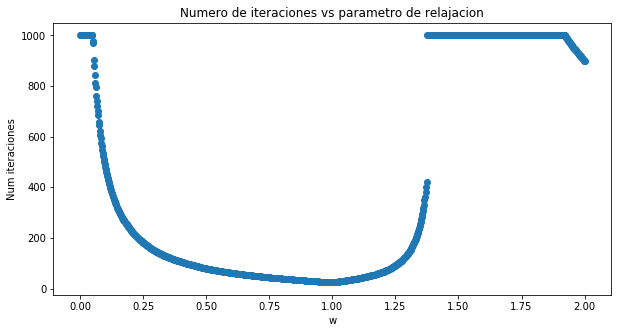

In [46]:
w_l = np.linspace(0,2,1000)
y = np.zeros(len(w_l))
for i,w in enumerate(w_l):
    y[i] = SOR(A,b,np.array([2,-1,3]),w)[1]
    
fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(w_l,y)
ax.set_title("Numero de iteraciones vs parametro de relajacion")
ax.set_xlabel("w")
ax.set_ylabel("Num iteraciones")

In [48]:
print(f"Las iteraciones se minimizan en aproximadamente w={np.round(w_l[np.argmin(y)],4)}")

Las iteraciones se minimizan en aproximadamente w=0.987


---

### **Ejercicio 11**

In [2]:
A = np.array([[1,2,-1],[1,0,1],[4,-4,5]])
#A = np.array([[2,1,0],[0,5,3],[0,0,8]])

In [3]:
A

array([[ 1,  2, -1],
       [ 1,  0,  1],
       [ 4, -4,  5]])

In [4]:
B = np.linalg.inv(A)

In [5]:
zk = np.array([1,-8,np.pi])
i = 0
while i<100:
    #normalizar
    zk = (1/np.linalg.norm(zk))*zk
    #kesimo vector 
    zk = B@zk
    i+=1

In [6]:
#Los valores propios de la inversa de A son los reciprocos de los valores propios de A
1/((zk.T@B)@zk)/np.linalg.norm(zk)**2

0.9999999999999991

In [7]:
#Si v es un vector propio de A^-1 asociado al valor propio lambda, 
#entonces v es un vector propio de A asociado al valor propio 1/lambda 
zk

array([ 0.40824829, -0.40824829, -0.81649658])

----

### **Ejercicio 12** 

$x_{n+1} = x_n - \mathbb{J}^-1(x_n)\mathbb{F}(x_n)$

In [82]:
# Definamos el sistema usando una lista
G1 = np.array([lambda x,y: np.log(x**2+y**2)-np.sin(x*y)-np.log(2)-np.log(np.pi),
     lambda x,y: np.exp(x-y)+np.cos(x*y)])


G2 = np.array([lambda x,y,z: 6*x-2*np.cos(y*z)-1,
     lambda x,y,z: 9*y+np.sqrt(x**2+np.sin(z)+1.06)+0.9,
     lambda x,y,z: 60*z+3*np.exp(-x*y)+10*np.pi-3])

In [83]:
def GetF(G,r):
    
    n = r.shape[0]
    
    v = np.zeros_like(r)
    
    if n==2:
        for i in range(n):
            v[i] = G[i](r[0],r[1])
    if n==3:
        for i in range(n):
            v[i] = G[i](r[0],r[1],r[2])
        
    return v

In [84]:
GetF(G2,np.array([0.,0.,0.]))

array([-3.        ,  1.92956301, 31.41592654])

In [102]:
def GetJacobian(f,r,h=1e-6):
    
    n = r.shape[0]
    
    J = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            
            rf = r.copy()
            rb = r.copy()
            
            rf[j] = rf[j] + h
            rb[j] = rb[j] - h

            if n==2:
                J[i,j] = (f[i](rf[0],rf[1]) - f[i](rb[0],rb[1]))/(2*h)
            if n==3:
                J[i,j] = (f[i](rf[0],rf[1],rf[2]) - f[i](rb[0],rb[1],rb[2]))/(2*h)
            
    return J

In [106]:
def NewtonRaphson(G,r,itmax=100,error=1e-6):
    
    it = 0
    d = 1.
    dvector = []
    
    while d > error and it < itmax:
        
        # Vector actual
        rc = r
        
        F = GetF(G,rc)
        J = GetJacobian(G,rc)
        InvJ = np.linalg.inv(J)
        
        r = rc - np.dot(InvJ,F)
        
        diff = r - rc
        
        d = np.max( np.abs(diff) )
        
        dvector.append(d)
        #print(dvector)
        
        it += 1
    
    return r,dvector,it

In [107]:
r,dvector,it = NewtonRaphson(G1,np.array([2.,2.]))

In [108]:
print(f"Aproximacion de la solucion: {r}")
print(f"Error: {dvector[-1]}")
print(f"Numero iteraciones: {it}")

Aproximacion de la solucion: [1.77245385 1.77245385]
Error: 2.167681589781978e-10
Numero iteraciones: 6


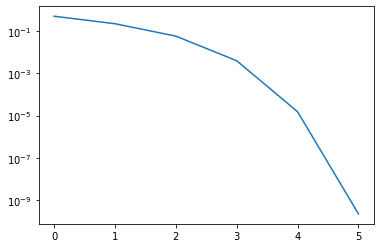

In [109]:
plt.plot(dvector)
plt.yscale('log')

In [110]:
r,dvector,it = NewtonRaphson(G2,np.array([0.,0.,0.]))

In [111]:
print(f"Aproximacion de la solucion: {r}")
print(f"Error: {dvector[-1]}")
print(f"Numero iteraciones: {it}")

Aproximacion de la solucion: [ 0.49814468 -0.1996059  -0.52882598]
Error: 7.48751061152575e-12
Numero iteraciones: 4


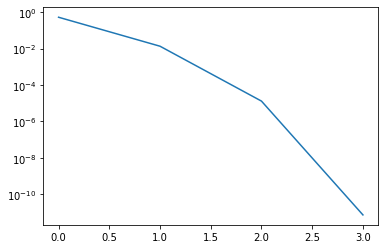

In [112]:
plt.plot(dvector)
plt.yscale('log')

---

### **Ejercicio 15**

In [15]:
from itertools import permutations

In [16]:
#Generadores del grupo SU(2)
sigmax = sym.Matrix([[0,1],[1,0]])
sigmay = sym.Matrix([[0,-sym.I],[sym.I,0]])
sigmaz = sym.Matrix([[1,0],[0,-1]])

In [31]:
def levi_civita(perm):
    '''Dada una permutacion, calcula el coeficiente Levi-Civita'''
    if perm in [(0,1,2),(1,2,0),(2,0,1)]:
        return 1
    elif perm in [(2,1,0),(0,2,1),(1,0,2)]:
        return -1
    else:
        return 0

In [70]:
def conmutador(A,B,C,perm):
    D =  A*B-B*A
    levi = levi_civita(perm)
    print(f"levi = {levi}")
    print(f"AB-BA = {D}")
    print(f"2*i*levi*sigmak = {(2*sym.I*levi)*C}")
    return D == (2*sym.I*levi)*C

In [71]:
# Define the indices
indices = [0, 1, 2]
permutations_3 = permutations(indices, 3)
permutations_list = list(permutations_3)

In [72]:
Algebra = [sigmax,sigmay,sigmaz]
for perm in permutations_list:
    print("------")
    print(f"Permutacion: {perm}")
    print(f"Coinciden: {conmutador(Algebra[perm[0]],Algebra[perm[1]],Algebra[perm[2]],perm)}")
    print("------\n")

------
Permutacion: (0, 1, 2)
levi = 1
AB-BA = Matrix([[2*I, 0], [0, -2*I]])
2*i*levi*sigmak = Matrix([[2*I, 0], [0, -2*I]])
Coinciden: True
------

------
Permutacion: (0, 2, 1)
levi = -1
AB-BA = Matrix([[0, -2], [2, 0]])
2*i*levi*sigmak = Matrix([[0, -2], [2, 0]])
Coinciden: True
------

------
Permutacion: (1, 0, 2)
levi = -1
AB-BA = Matrix([[-2*I, 0], [0, 2*I]])
2*i*levi*sigmak = Matrix([[-2*I, 0], [0, 2*I]])
Coinciden: True
------

------
Permutacion: (1, 2, 0)
levi = 1
AB-BA = Matrix([[0, 2*I], [2*I, 0]])
2*i*levi*sigmak = Matrix([[0, 2*I], [2*I, 0]])
Coinciden: True
------

------
Permutacion: (2, 0, 1)
levi = 1
AB-BA = Matrix([[0, 2], [-2, 0]])
2*i*levi*sigmak = Matrix([[0, 2], [-2, 0]])
Coinciden: True
------

------
Permutacion: (2, 1, 0)
levi = -1
AB-BA = Matrix([[0, -2*I], [-2*I, 0]])
2*i*levi*sigmak = Matrix([[0, -2*I], [-2*I, 0]])
Coinciden: True
------



---

### **Ejercicio 16 - Pendiente de aclarar**

In [114]:
gamma0 = sym.Matrix([[1,0,0,0],[0,1,0,0],[0,0,-1,0],[0,0,0,-1]])
gamma1 = sym.Matrix([[0,0,0,1],[0,0,1,0],[0,-1,0,0],[-1,0,0,0]])
gamma2 = sym.Matrix([[0,0,0,-sym.I],[0,0,sym.I,0],[0,sym.I,0,0],[-sym.I,0,0,0]])
gamma3 = sym.Matrix([[0,0,1,0],[0,0,0,-1],[-1,0,0,0],[0,1,0,0]])

In [133]:
gamma3*gamma0 + gamma0*gamma3

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [128]:
gamma3*gamma1+gamma1*gamma3

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

---

### **Ejercicio 17**

In [4]:
x = sym.Symbol("x",real=True)
y = sym.Symbol("y",real=True)

z = x + sym.I*y

In [10]:
def funcion(z):
    return z**3-1

In [25]:
F = np.array([sym.re(funcion(z)), sym.im(funcion(z))])

In [30]:
J = sym.zeros(2,2)

for i in range(2):
    for j in range(2):
        if j==0:
            J[i,j] = sym.diff(F[i],x,1)
        else:
            J[i,j] = sym.diff(F[i],y,1)

J #Jacobiano de la funcion F

Matrix([
[3*x**2 - 3*y**2,          -6*x*y],
[          6*x*y, 3*x**2 - 3*y**2]])

In [43]:
#Funcion F en numpy
Fn = sym.lambdify([x,y],F,'numpy')
#Jacobiano en numpy 
Jn = sym.lambdify([x,y],J, 'numpy')

In [50]:
def newton(z,F,J,itmax= 1000, bound = 1e-7 ):
    
    it = 0
    
    zn = z
    
    norma = 1
    
    while norma > bound and it<=itmax:
        
        Jn_inv = np.linalg.inv(Jn(zn[0],zn[1]))
        Fn = F(zn[0],zn[1])
        
        zn_1 = zn - Jn_inv@Fn
        
        diff = zn_1-zn
        norma = np.linalg.norm(diff)
        
        zn = zn_1
        it +=1
        
    
    return zn_1
        
    

In [51]:
z0 = np.array([0.5,0.5])
newton(z0,Fn,Jn)

array([-0.5      ,  0.8660254])

In [84]:
N = 300
x = np.linspace(-1,1,N)
y = np.linspace(-1,1,N)
Fractal = np.zeros((N,N),np.int64)
Raices = np.array([
    [-0.5,np.sqrt(3)/2],
    [-0.5,-np.sqrt(3)/2],
    [1,0]
])

In [88]:


for i in range(N):
    for j in range(N):
        zk = np.array([x[i],y[j]])
        aprox = newton(zk,Fn,Jn)
        if np.linalg.norm(Raices[0]-aprox)<1e-4:
            Fractal[i,j]=20 

        elif np.linalg.norm(Raices[1]-aprox)<1e-4:
            Fractal[i,j] = 100

        elif np.linalg.norm(Raices[2]-aprox)<1e-4:
            Fractal[i,j] = 255
            
        else:
            pass
    

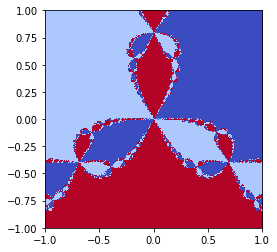

In [89]:
plt.imshow(Fractal, cmap='coolwarm' ,extent=[-1,1,-1,1])

----

# **Aprendizaje Automatico**

------

In [141]:
from tqdm import tqdm

La funcion $|x-2|$ no es diferenciable en el mínimo ($x=2$)

In [114]:
def funcion(x):
    return np.abs(x-2)

In [118]:
Dx = lambda f,x,h=1e-5: (f(x+h) - f(x-h))/(2*h)

In [137]:
def Minimizer(f, N=300, gamma=0.01):
    
    r = np.zeros(N)
    
    r[0] = np.random.uniform(0,4)
    
    for i in tqdm(range(1,N)):
        r[i] = r[i-1] - gamma*Dx(f,r[i-1])
        
    return r

In [138]:
x = Minimizer(funcion)

100%|████████████████████████████████████████████████████████████████████████████████████████| 299/299 [00:00<?, ?it/s]


In [142]:
x[-1]

-0.00884300213920087